# Fashion MNIST Clothing Classification

In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


4422102/4422102 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


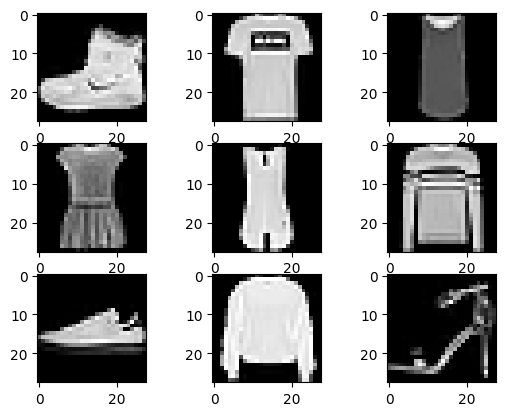

In [1]:
# example of loading the fashion mnist dataset
from matplotlib import pyplot
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [21]:
# baseline cnn model for fashion mnist
import numpy as np
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve


# Evaluation functions and graph functions

In [12]:
def plot_accuracy(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [13]:
def plot_loss(history):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [16]:
def plot_confusion_matrix(model, testX, testY):
    # Make predictions on test set
    y_pred = model.predict(testX)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(testY, axis=1)

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [18]:
def plot_roc_curve(model, testX, testY):
    # Make predictions on test set
    y_pred = model.predict(testX)

    # Calculate ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = testY.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(testY[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    plt.figure(figsize=(10, 7))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class %d (AUC = %0.2f)' % (i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

In [19]:
def plot_precision_recall_curve(model, testX, testY):
    test_pred = model.predict(testX)
    precision = dict()
    recall = dict()
    pr_auc = dict()
    for i in range(10):
        precision[i], recall[i], _ = precision_recall_curve(testY[:, i], test_pred[:, i])
        pr_auc[i] = auc(recall[i], precision[i])
    # Plot precision-recall curve for each class
    plt.figure()
    plt.plot([0, 1], [1, 0], 'k--')
    for i in range(10):
        plt.plot(recall[i], precision[i], label='Class %d (AUC = %0.2f)' % (i, pr_auc[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# Model 1

In [4]:
# Load dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
trainX = trainX / 255.0
testX = testX / 255.0

# Flatten the images
trainX = trainX.reshape(trainX.shape[0], -1)
testX = testX.reshape(testX.shape[0], -1)

# One-hot encode target variables
trainY = np_utils.to_categorical(trainY)
testY = np_utils.to_categorical(testY)

# Define the MLP model 1
model1 = Sequential()
model1.add(Dense(128, input_dim=trainX.shape[1], activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

# Compile the model 1
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model 1
history1 = model1.fit(trainX, trainY, validation_split=0.2, epochs=10, batch_size=32, verbose=2)

# Evaluate the model 1 on test set
loss, accuracy = model1.evaluate(testX, testY, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


# Save model1
model1.save('/content/gdrive/My Drive/Colab Notebooks/Winter-2023/Grass P2/Saved Models - Grass - P2/model1.h5')

# Save history1
import json
with open('/content/gdrive/My Drive/Colab Notebooks/Winter-2023/Grass P2/Saved Models - Grass - P2/history1.json', 'w') as f:
    json.dump(history1.history, f)

Epoch 1/10
1500/1500 - 11s - loss: 0.5160 - accuracy: 0.8185 - val_loss: 0.4172 - val_accuracy: 0.8515 - 11s/epoch - 7ms/step
Epoch 2/10
1500/1500 - 4s - loss: 0.3780 - accuracy: 0.8628 - val_loss: 0.3595 - val_accuracy: 0.8687 - 4s/epoch - 3ms/step
Epoch 3/10
1500/1500 - 8s - loss: 0.3382 - accuracy: 0.8751 - val_loss: 0.3572 - val_accuracy: 0.8672 - 8s/epoch - 5ms/step
Epoch 4/10
1500/1500 - 4s - loss: 0.3168 - accuracy: 0.8824 - val_loss: 0.3659 - val_accuracy: 0.8730 - 4s/epoch - 3ms/step
Epoch 5/10
1500/1500 - 5s - loss: 0.2983 - accuracy: 0.8901 - val_loss: 0.3333 - val_accuracy: 0.8793 - 5s/epoch - 3ms/step
Epoch 6/10
1500/1500 - 4s - loss: 0.2810 - accuracy: 0.8959 - val_loss: 0.3410 - val_accuracy: 0.8767 - 4s/epoch - 3ms/step
Epoch 7/10
1500/1500 - 4s - loss: 0.2698 - accuracy: 0.8991 - val_loss: 0.3257 - val_accuracy: 0.8815 - 4s/epoch - 3ms/step
Epoch 8/10
1500/1500 - 5s - loss: 0.2566 - accuracy: 0.9033 - val_loss: 0.3173 - val_accuracy: 0.8888 - 5s/epoch - 3ms/step
Epoch 

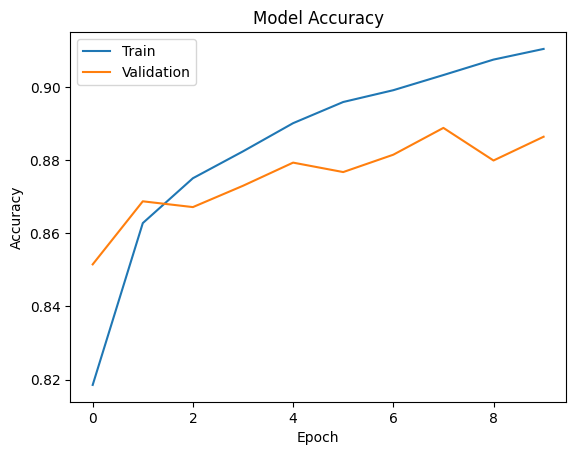

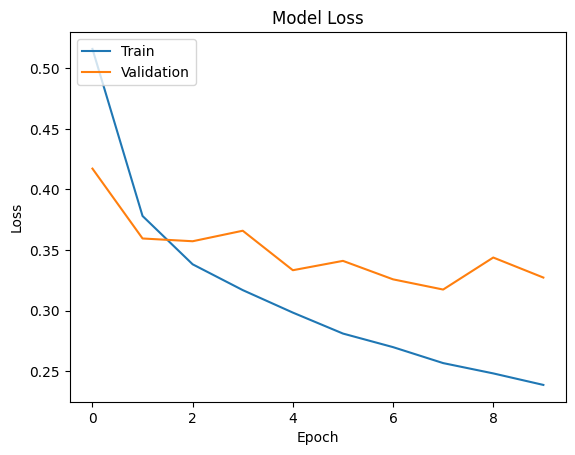

313/313 [==============================] - 1s 2ms/step


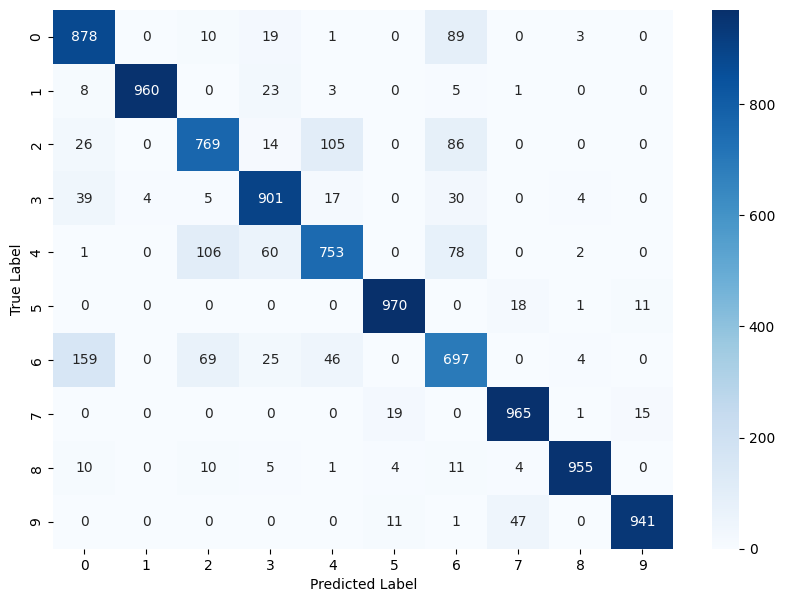

313/313 [==============================] - 0s 1ms/step


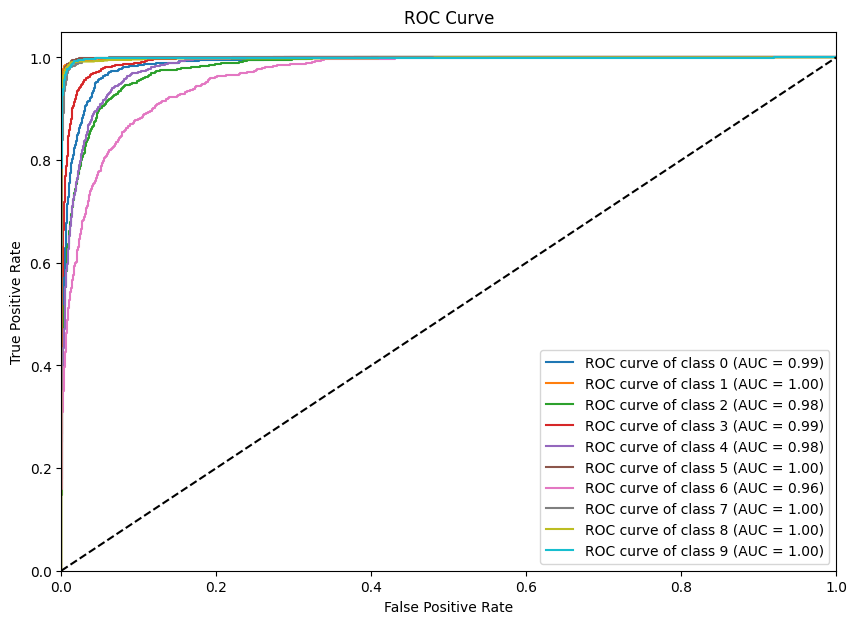

313/313 [==============================] - 1s 2ms/step


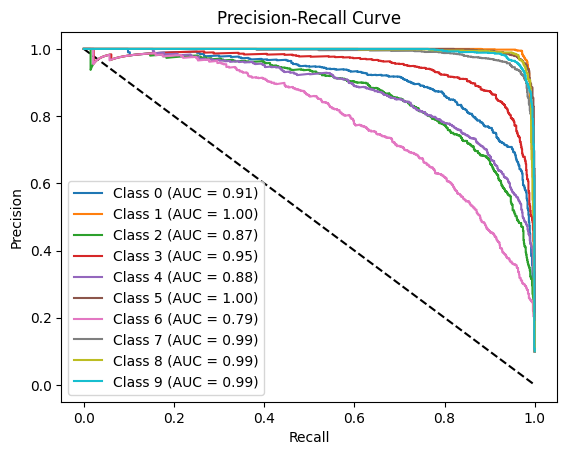

In [22]:
plot_accuracy(history1)
plot_loss(history1)
plot_confusion_matrix(model1, testX, testY)
plot_roc_curve(model1, testX, testY)
plot_precision_recall_curve(model1, testX, testY)

# Model 2

In [27]:
# Define the MLP model with dropout regularization
model2 = Sequential()
model2.add(Dense(128, input_dim=trainX.shape[1], activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history2 = model2.fit(trainX, trainY, validation_split=0.2, epochs=10, batch_size=32, verbose=2)

# Evaluate the model on test set
loss, accuracy = model2.evaluate(testX, testY, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


# Save model1
model2.save('/content/gdrive/My Drive/Colab Notebooks/Winter-2023/Grass P2/Saved Models - Grass - P2/model2.h5')

# Save history1
import json
with open('/content/gdrive/My Drive/Colab Notebooks/Winter-2023/Grass P2/Saved Models - Grass - P2/history2.json', 'w') as f:
    json.dump(history2.history, f)

Epoch 1/10
1500/1500 - 5s - loss: 0.6112 - accuracy: 0.7825 - val_loss: 0.4325 - val_accuracy: 0.8423 - 5s/epoch - 4ms/step
Epoch 2/10
1500/1500 - 5s - loss: 0.4412 - accuracy: 0.8405 - val_loss: 0.3838 - val_accuracy: 0.8591 - 5s/epoch - 4ms/step
Epoch 3/10
1500/1500 - 5s - loss: 0.4029 - accuracy: 0.8525 - val_loss: 0.3667 - val_accuracy: 0.8633 - 5s/epoch - 3ms/step
Epoch 4/10
1500/1500 - 7s - loss: 0.3788 - accuracy: 0.8604 - val_loss: 0.3412 - val_accuracy: 0.8764 - 7s/epoch - 4ms/step
Epoch 5/10
1500/1500 - 7s - loss: 0.3629 - accuracy: 0.8681 - val_loss: 0.3514 - val_accuracy: 0.8715 - 7s/epoch - 5ms/step
Epoch 6/10
1500/1500 - 8s - loss: 0.3479 - accuracy: 0.8723 - val_loss: 0.3340 - val_accuracy: 0.8788 - 8s/epoch - 5ms/step
Epoch 7/10
1500/1500 - 5s - loss: 0.3338 - accuracy: 0.8778 - val_loss: 0.3372 - val_accuracy: 0.8801 - 5s/epoch - 3ms/step
Epoch 8/10
1500/1500 - 4s - loss: 0.3290 - accuracy: 0.8780 - val_loss: 0.3438 - val_accuracy: 0.8755 - 4s/epoch - 3ms/step
Epoch 9/

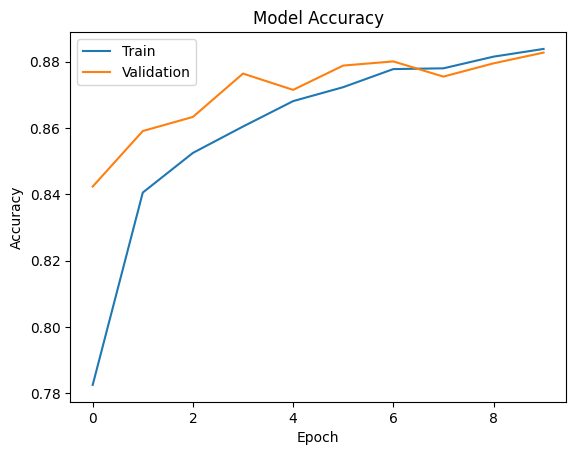

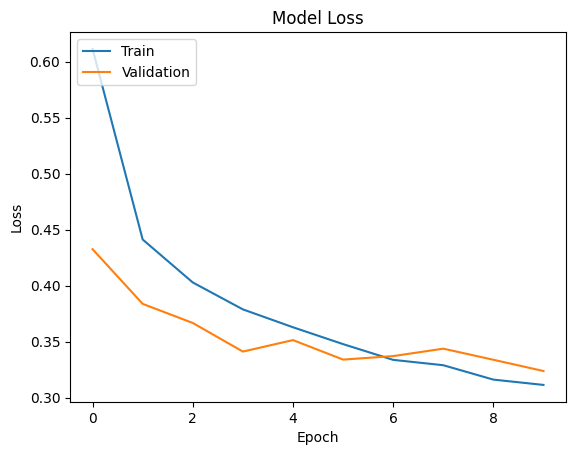

313/313 [==============================] - 2s 6ms/step


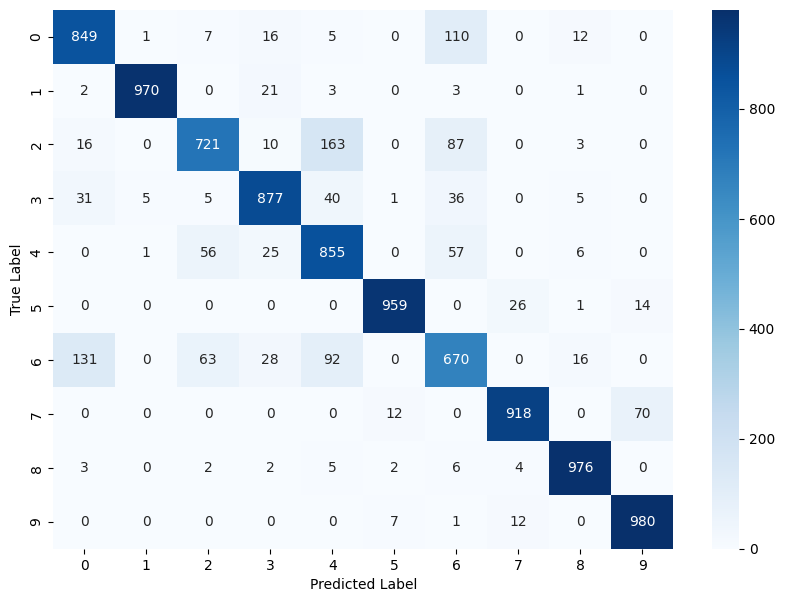

313/313 [==============================] - 2s 5ms/step


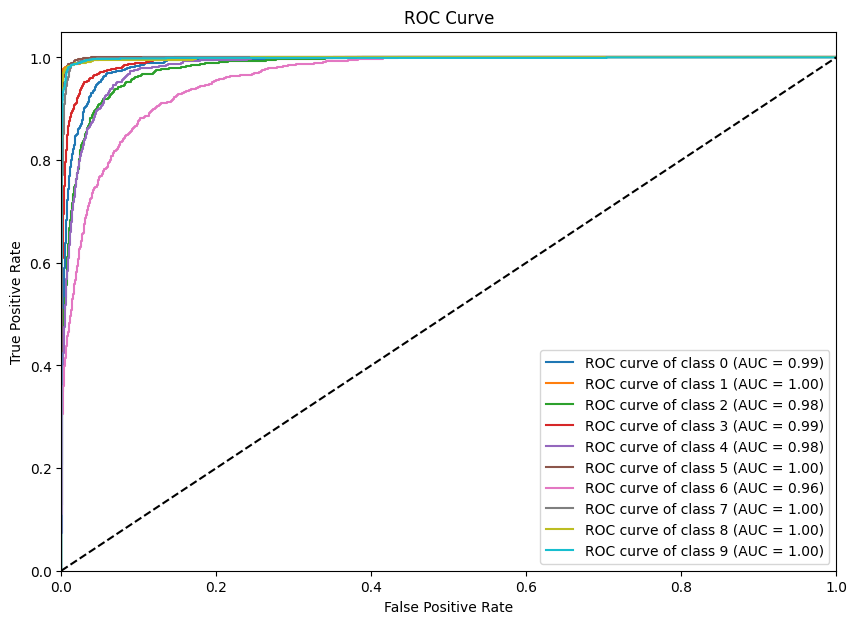

313/313 [==============================] - 1s 2ms/step


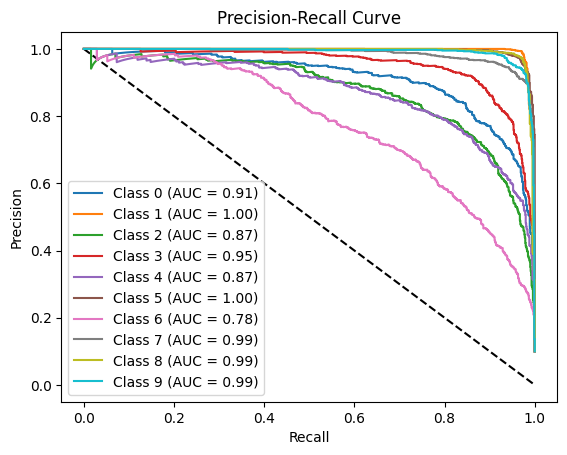

In [28]:
plot_accuracy(history2)
plot_loss(history2)
plot_confusion_matrix(model2, testX, testY)
plot_roc_curve(model2, testX, testY)
plot_precision_recall_curve(model2, testX, testY)

# Model 3

In [44]:
# Load dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
trainX = trainX / 255.0
testX = testX / 255.0

# Reshape the images to be 4D arrays for data augmentation
trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)
testX = testX.reshape(testX.shape[0], 28, 28, 1)

# One-hot encode target variables
trainY = np_utils.to_categorical(trainY)
testY = np_utils.to_categorical(testY)

# Define the MLP model with dropout regularization
model3 = Sequential()
model3.add(Flatten(input_shape=trainX.shape[1:]))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(10, activation='softmax'))

# Compile the model
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the data generator for data augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)

# Fit the model with data augmentation
history3 = model3.fit(datagen.flow(trainX, trainY, batch_size=32), validation_data=(testX, testY), epochs=10, verbose=2)


# Evaluate the model on test set
loss, accuracy = model3.evaluate(testX, testY, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


# Save model
model3.save('/content/gdrive/My Drive/Colab Notebooks/Winter-2023/Grass P2/Saved Models - Grass - P2/model3.h5')

# Save history
import json
with open('/content/gdrive/My Drive/Colab Notebooks/Winter-2023/Grass P2/Saved Models - Grass - P2/history3.json', 'w') as f:
    json.dump(history3.history, f)

Epoch 1/10
1875/1875 - 26s - loss: 0.9470 - accuracy: 0.6403 - val_loss: 0.6647 - val_accuracy: 0.7417 - 26s/epoch - 14ms/step
Epoch 2/10
1875/1875 - 20s - loss: 0.7651 - accuracy: 0.7081 - val_loss: 0.6226 - val_accuracy: 0.7542 - 20s/epoch - 11ms/step
Epoch 3/10
1875/1875 - 22s - loss: 0.7232 - accuracy: 0.7233 - val_loss: 0.5942 - val_accuracy: 0.7705 - 22s/epoch - 12ms/step
Epoch 4/10
1875/1875 - 22s - loss: 0.7001 - accuracy: 0.7340 - val_loss: 0.5803 - val_accuracy: 0.7731 - 22s/epoch - 11ms/step
Epoch 5/10
1875/1875 - 22s - loss: 0.6751 - accuracy: 0.7440 - val_loss: 0.5748 - val_accuracy: 0.7876 - 22s/epoch - 12ms/step
Epoch 6/10
1875/1875 - 20s - loss: 0.6653 - accuracy: 0.7469 - val_loss: 0.5438 - val_accuracy: 0.7879 - 20s/epoch - 11ms/step
Epoch 7/10
1875/1875 - 22s - loss: 0.6558 - accuracy: 0.7490 - val_loss: 0.5219 - val_accuracy: 0.8027 - 22s/epoch - 12ms/step
Epoch 8/10
1875/1875 - 22s - loss: 0.6469 - accuracy: 0.7554 - val_loss: 0.5291 - val_accuracy: 0.8039 - 22s/ep

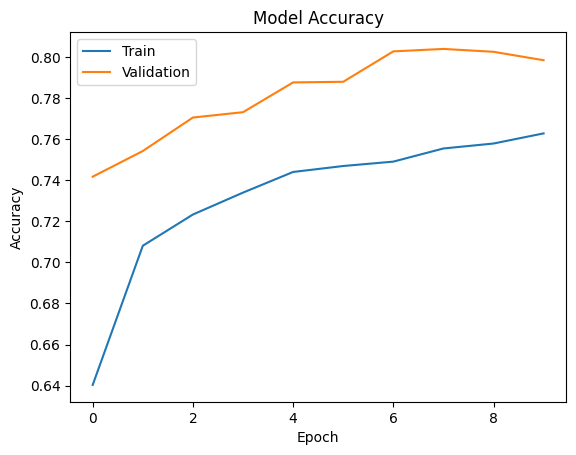

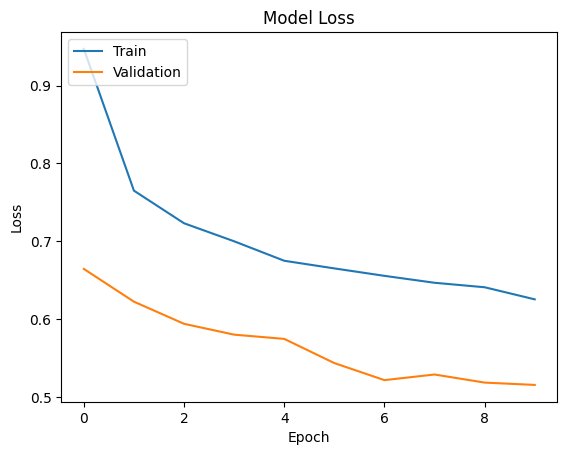

313/313 [==============================] - 1s 2ms/step


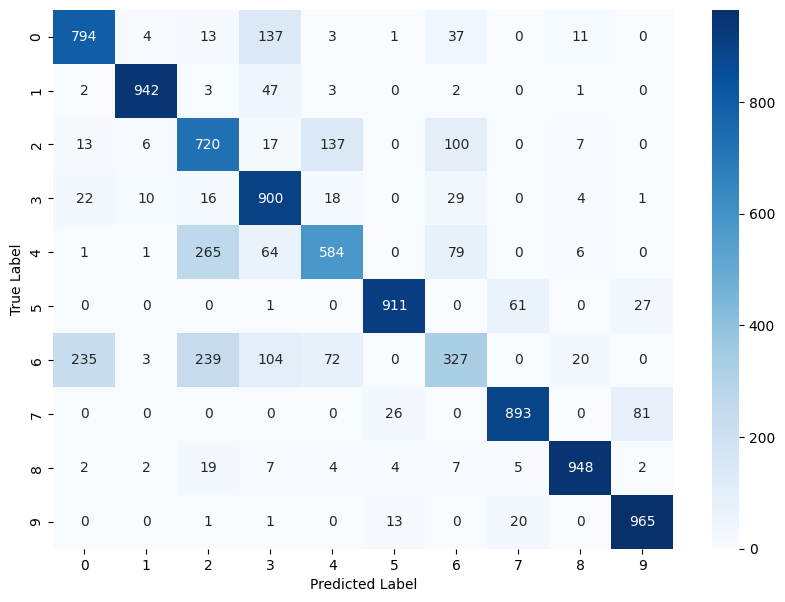

313/313 [==============================] - 1s 2ms/step


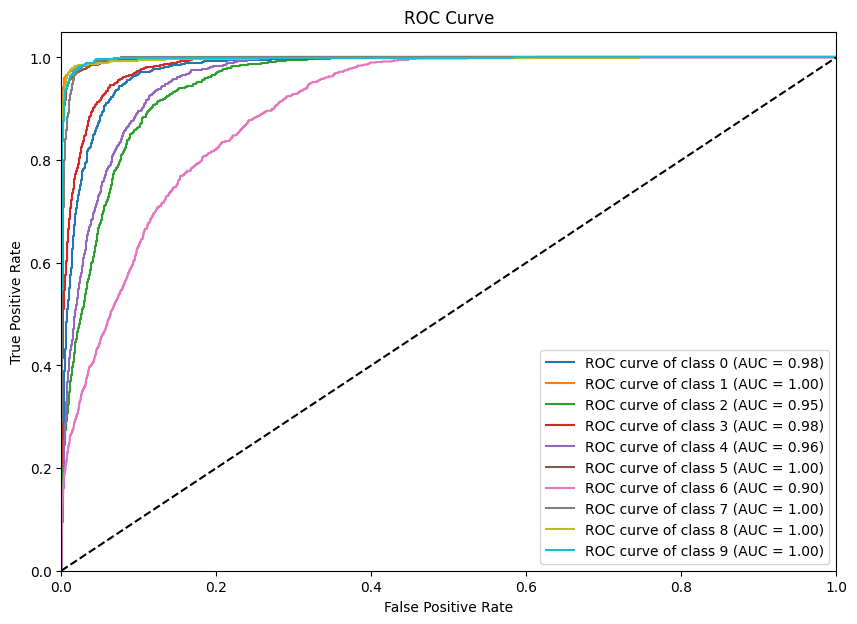

313/313 [==============================] - 1s 2ms/step


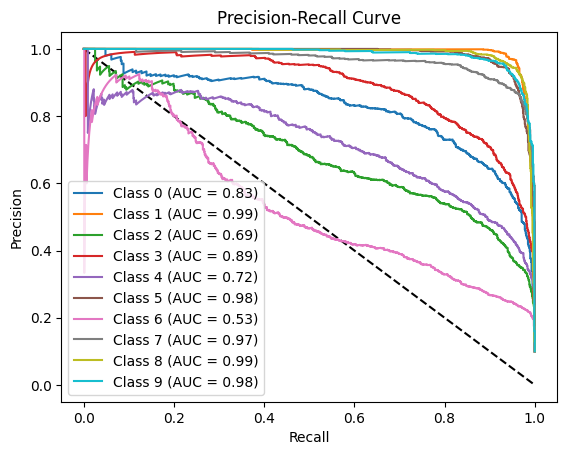

In [45]:
plot_accuracy(history3)
plot_loss(history3)
plot_confusion_matrix(model3, testX, testY)
plot_roc_curve(model3, testX, testY)
plot_precision_recall_curve(model3, testX, testY)

# Model 4 a

In [47]:
# load the data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# normalize the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# one-hot encode the labels
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# define the model
model4a = Sequential()
model4a.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model4a.add(MaxPooling2D((2, 2)))
model4a.add(Conv2D(64, (3, 3), activation='relu'))
model4a.add(MaxPooling2D((2, 2)))
model4a.add(Conv2D(128, (3, 3), activation='relu'))
model4a.add(Flatten())
model4a.add(Dense(128, activation='relu'))
model4a.add(Dense(num_classes, activation='softmax'))

# compile the model
model4a.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history4a = model4a.fit(X_train.reshape(-1, 28, 28, 1), y_train, validation_data=(X_test.reshape(-1, 28, 28, 1), y_test), epochs=10, batch_size=128)


# Evaluate the model on test set
loss, accuracy = model4a.evaluate(testX, testY, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


# Save model
model4a.save('/content/gdrive/My Drive/Colab Notebooks/Winter-2023/Grass P2/Saved Models - Grass - P2/model4a.h5')

# Save history
import json
with open('/content/gdrive/My Drive/Colab Notebooks/Winter-2023/Grass P2/Saved Models - Grass - P2/history4a.json', 'w') as f:
    json.dump(history4a.history, f)

Epoch 1/10
469/469 [==============================] - 6s 8ms/step - loss: 0.5627 - accuracy: 0.7941 - val_loss: 0.3973 - val_accuracy: 0.8567
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3427 - accuracy: 0.8762 - val_loss: 0.3297 - val_accuracy: 0.8810
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2927 - accuracy: 0.8950 - val_loss: 0.3050 - val_accuracy: 0.8902
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2599 - accuracy: 0.9044 - val_loss: 0.2831 - val_accuracy: 0.8974
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2357 - accuracy: 0.9130 - val_loss: 0.2768 - val_accuracy: 0.8982
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2146 - accuracy: 0.9223 - val_loss: 0.2566 - val_accuracy: 0.9057
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1956 - accuracy: 0.9284 - val_loss: 0.2629 - val_accuracy: 0.9053
Epoch 

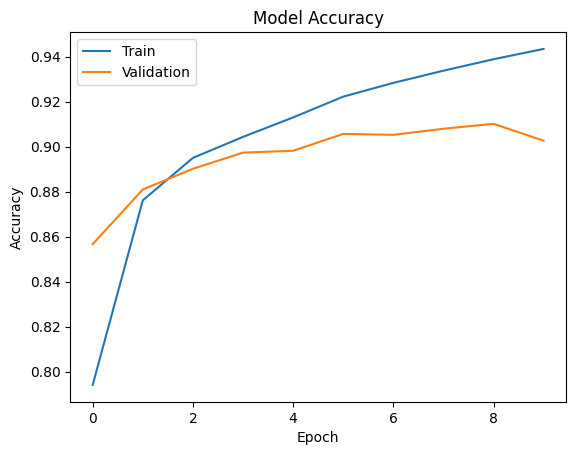

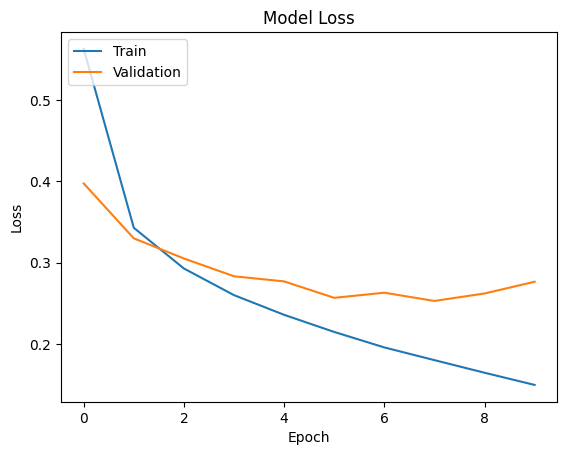

313/313 [==============================] - 1s 2ms/step


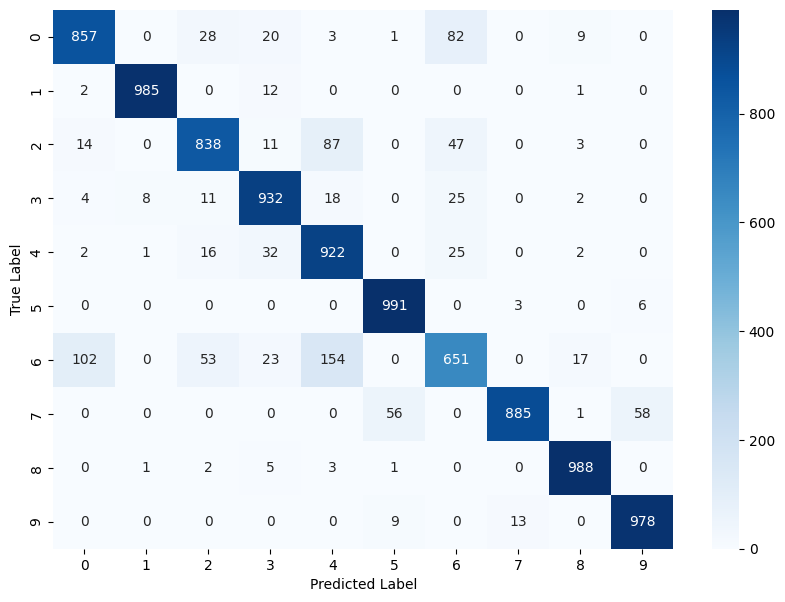

313/313 [==============================] - 1s 2ms/step


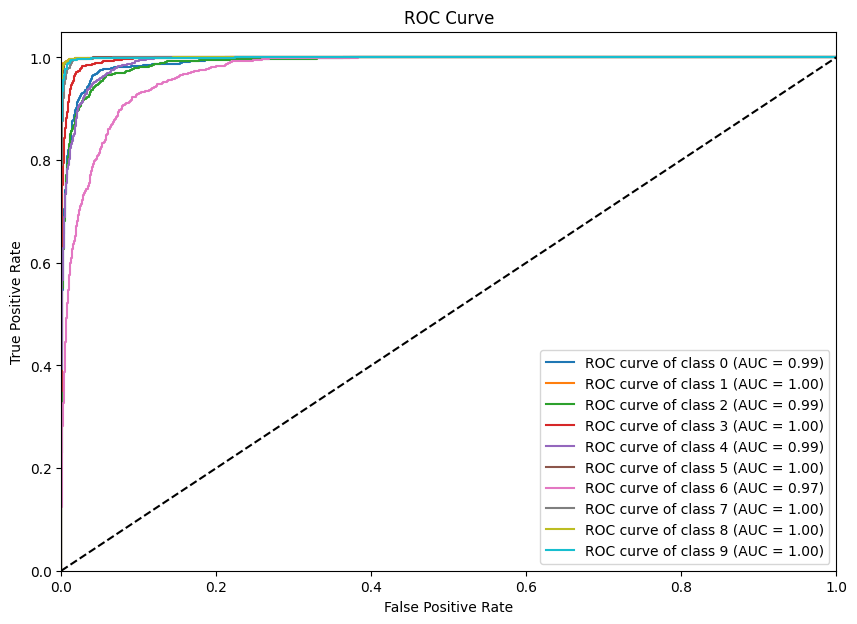

313/313 [==============================] - 1s 2ms/step


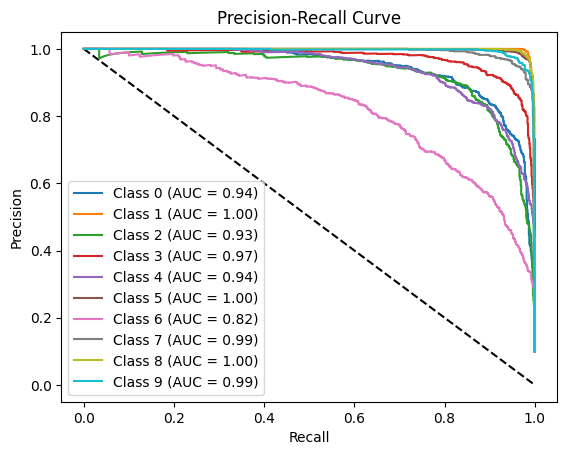

In [50]:
plot_accuracy(history4a)
plot_loss(history4a)
plot_confusion_matrix(model4a, X_test, y_test)
plot_roc_curve(model4a, X_test, y_test)
plot_precision_recall_curve(model4a, X_test, y_test)

# Model 4 b

In [51]:
# load the data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# normalize the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# one-hot encode the labels
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# define the model
model4b = Sequential()
model4b.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model4b.add(BatchNormalization())
model4b.add(MaxPooling2D((2, 2)))
model4b.add(Conv2D(64, (3, 3), activation='relu'))
model4b.add(BatchNormalization())
model4b.add(MaxPooling2D((2, 2)))
model4b.add(Conv2D(128, (3, 3), activation='relu'))
model4b.add(Flatten())
model4b.add(Dense(128, activation='relu'))
model4b.add(Dense(num_classes, activation='softmax'))

# compile the model
model4b.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history4b = model4b.fit(X_train.reshape(-1, 28, 28, 1), y_train, validation_data=(X_test.reshape(-1, 28, 28, 1), y_test), epochs=10, batch_size=128)



# Evaluate the model on test set
loss, accuracy = model4b.evaluate(testX, testY, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


# Save model
model4b.save('/content/gdrive/My Drive/Colab Notebooks/Winter-2023/Grass P2/Saved Models - Grass - P2/model3.h5')

# Save history
import json
with open('/content/gdrive/My Drive/Colab Notebooks/Winter-2023/Grass P2/Saved Models - Grass - P2/history4b.json', 'w') as f:
    json.dump(history4b.history, f)

Epoch 1/10
469/469 [==============================] - 8s 12ms/step - loss: 0.3984 - accuracy: 0.8546 - val_loss: 0.6380 - val_accuracy: 0.7715
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2619 - accuracy: 0.9037 - val_loss: 0.3687 - val_accuracy: 0.8689
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2141 - accuracy: 0.9214 - val_loss: 0.2773 - val_accuracy: 0.9000
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1823 - accuracy: 0.9318 - val_loss: 0.3204 - val_accuracy: 0.8863
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1571 - accuracy: 0.9418 - val_loss: 0.2675 - val_accuracy: 0.9072
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1400 - accuracy: 0.9478 - val_loss: 0.2805 - val_accuracy: 0.9029
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1182 - accuracy: 0.9554 - val_loss: 0.2896 - val_accuracy: 0.9066
Epoch

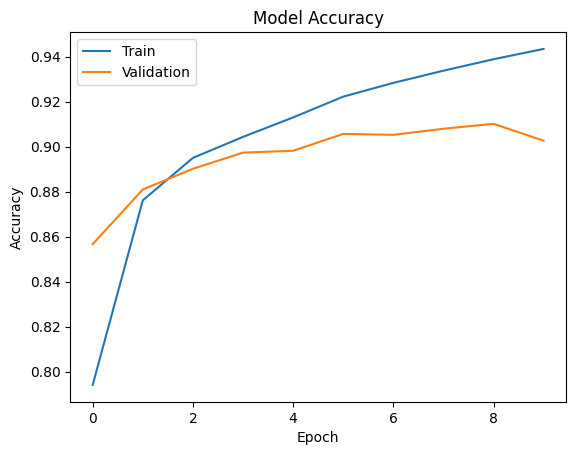

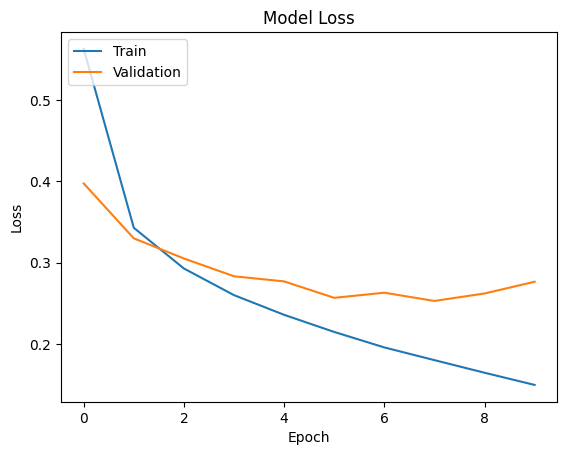

313/313 [==============================] - 1s 3ms/step


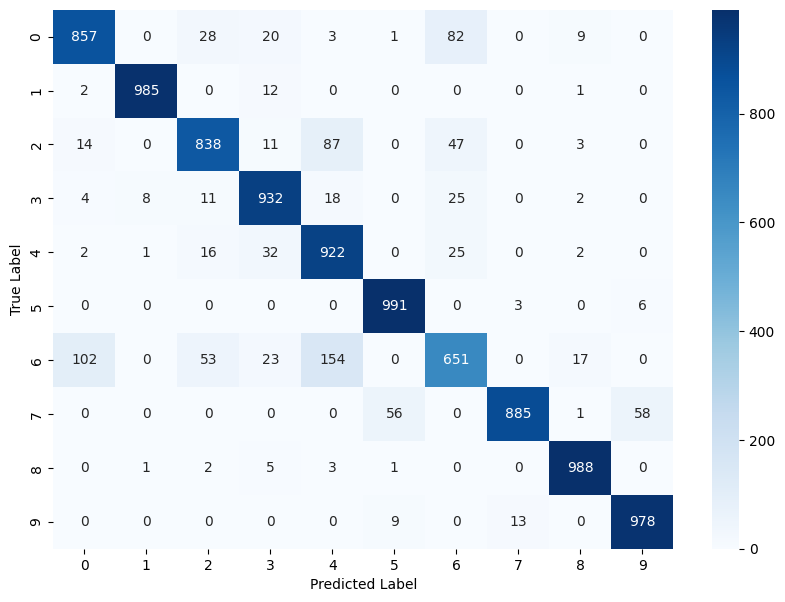

313/313 [==============================] - 1s 3ms/step


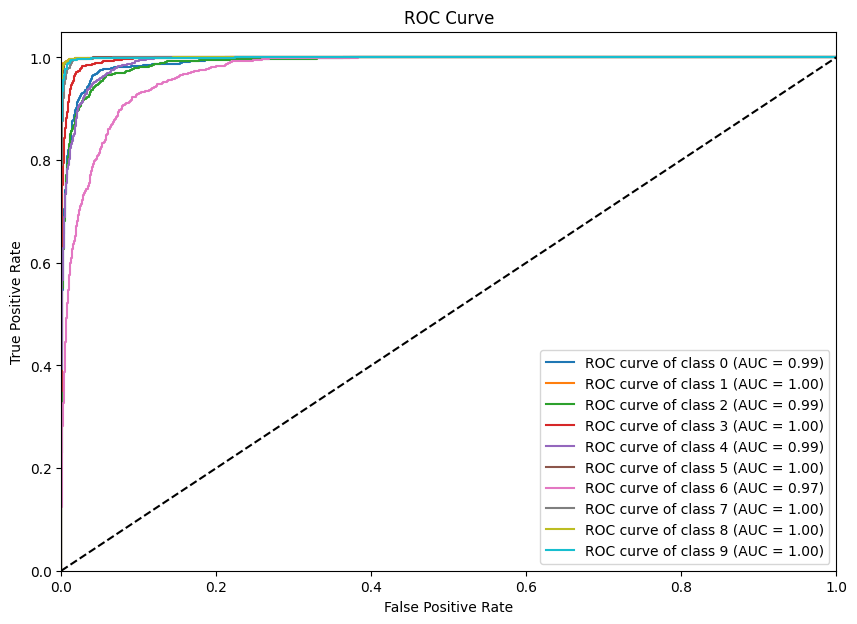

313/313 [==============================] - 1s 2ms/step


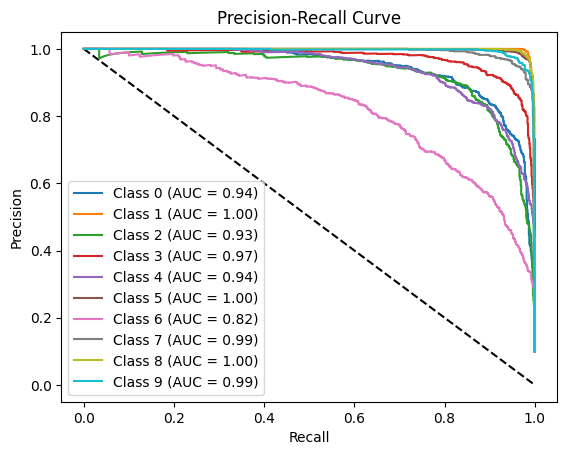

In [52]:
plot_accuracy(history4a)
plot_loss(history4a)
plot_confusion_matrix(model4a, X_test, y_test)
plot_roc_curve(model4a, X_test, y_test)
plot_precision_recall_curve(model4a, X_test, y_test)

# Model 5

In [35]:
# load the data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# normalize the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# one-hot encode the labels
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# define the model
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.25))
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.25))
model5.add(Conv2D(128, (3, 3), activation='relu'))
model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(num_classes, activation='softmax'))

# compile the model
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history5 = model5.fit(X_train.reshape(-1, 28, 28, 1), y_train, validation_data=(X_test.reshape(-1, 28, 28, 1), y_test), epochs=10, batch_size=128)

# Evaluate the model on test set
loss, accuracy = model5.evaluate(X_test.reshape(-1, 28, 28, 1), y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Save model
model5.save('/content/gdrive/My Drive/Colab Notebooks/Winter-2023/Grass P2/Saved Models - Grass - P2/model5.h5')

# Save history
import json
with open('/content/gdrive/My Drive/Colab Notebooks/Winter-2023/Grass P2/Saved Models - Grass - P2/history5.json', 'w') as f:
    json.dump(history5.history, f)

Epoch 1/10
469/469 [==============================] - 6s 8ms/step - loss: 0.6020 - accuracy: 0.7833 - val_loss: 0.7341 - val_accuracy: 0.7454
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3952 - accuracy: 0.8601 - val_loss: 0.3672 - val_accuracy: 0.8683
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3415 - accuracy: 0.8766 - val_loss: 0.3325 - val_accuracy: 0.8797
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3154 - accuracy: 0.8860 - val_loss: 0.2869 - val_accuracy: 0.8945
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2976 - accuracy: 0.8931 - val_loss: 0.2841 - val_accuracy: 0.8956
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2785 - accuracy: 0.8996 - val_loss: 0.3066 - val_accuracy: 0.8902
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2693 - accuracy: 0.9019 - val_loss: 0.2689 - val_accuracy: 0.9063
Epoch 

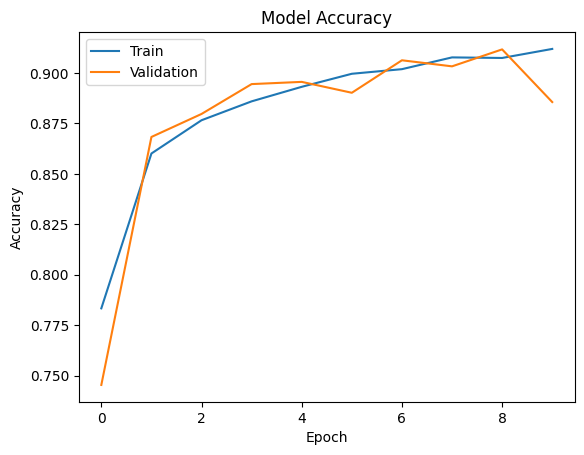

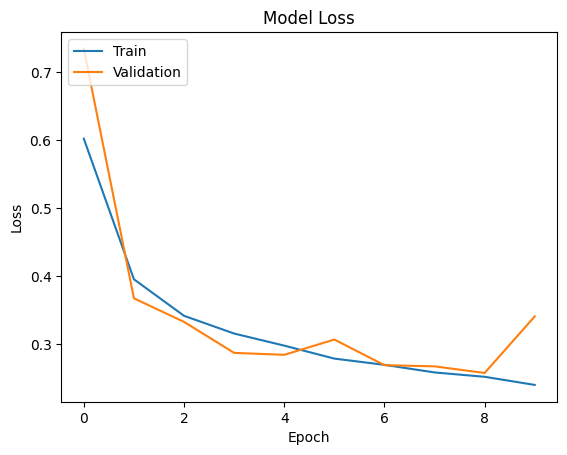

313/313 [==============================] - 1s 2ms/step


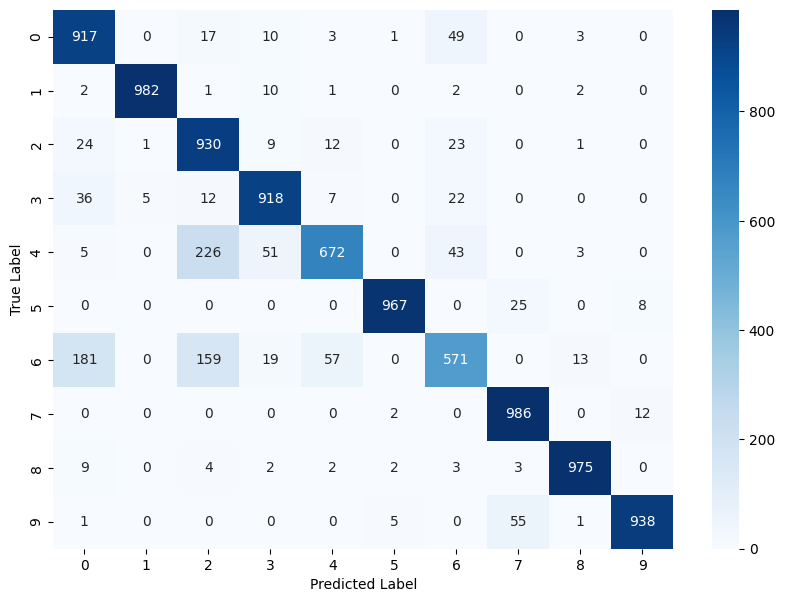

313/313 [==============================] - 1s 2ms/step


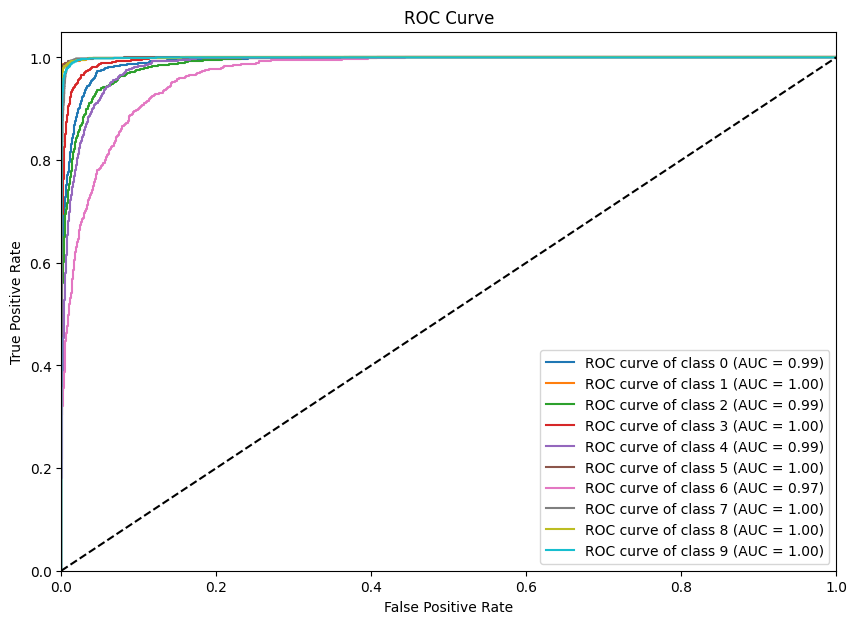

313/313 [==============================] - 1s 3ms/step


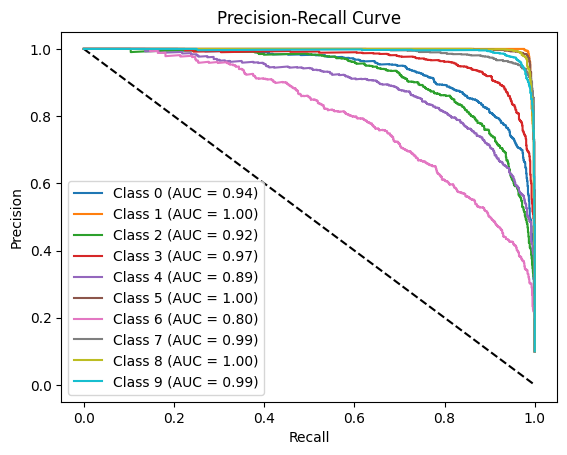

In [36]:
plot_accuracy(history5)
plot_loss(history5)
plot_confusion_matrix(model5, X_test, y_test)
plot_roc_curve(model5, X_test, y_test)
plot_precision_recall_curve(model5, X_test, y_test)

# Model 6

In [37]:
# load the data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# normalize the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# one-hot encode the labels
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


# define the model
model6 = Sequential()
model6.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model6.add(BatchNormalization())
model6.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.25))
model6.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model6.add(BatchNormalization())
model6.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.25))
model6.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model6.add(BatchNormalization())
model6.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.25))
model6.add(Flatten())
model6.add(Dense(512, activation='relu'))
model6.add(Dropout(0.5))
model6.add(Dense(num_classes, activation='softmax'))

# compile the model
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history6 = model6.fit(X_train.reshape(-1, 28, 28, 1), y_train, validation_data=(X_test.reshape(-1, 28, 28, 1), y_test), epochs=20, batch_size=128)


# Evaluate the model on test set
loss, accuracy = model6.evaluate(X_test.reshape(-1, 28, 28, 1), y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Save model
model6.save('/content/gdrive/My Drive/Colab Notebooks/Winter-2023/Grass P2/Saved Models - Grass - P2/model6.h5')

# Save history
import json
with open('/content/gdrive/My Drive/Colab Notebooks/Winter-2023/Grass P2/Saved Models - Grass - P2/history6.json', 'w') as f:
    json.dump(history6.history, f)

Epoch 1/20
469/469 [==============================] - 14s 20ms/step - loss: 0.5767 - accuracy: 0.7962 - val_loss: 1.5924 - val_accuracy: 0.5889
Epoch 2/20
469/469 [==============================] - 11s 24ms/step - loss: 0.3392 - accuracy: 0.8767 - val_loss: 0.2974 - val_accuracy: 0.8902
Epoch 3/20
469/469 [==============================] - 9s 19ms/step - loss: 0.2915 - accuracy: 0.8943 - val_loss: 0.2796 - val_accuracy: 0.9004
Epoch 4/20
469/469 [==============================] - 9s 18ms/step - loss: 0.2665 - accuracy: 0.9025 - val_loss: 0.2409 - val_accuracy: 0.9132
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 0.2436 - accuracy: 0.9119 - val_loss: 0.2423 - val_accuracy: 0.9111
Epoch 6/20
469/469 [==============================] - 9s 18ms/step - loss: 0.2288 - accuracy: 0.9169 - val_loss: 0.2217 - val_accuracy: 0.9197
Epoch 7/20
469/469 [==============================] - 9s 18ms/step - loss: 0.2180 - accuracy: 0.9194 - val_loss: 0.2189 - val_accuracy: 0.91

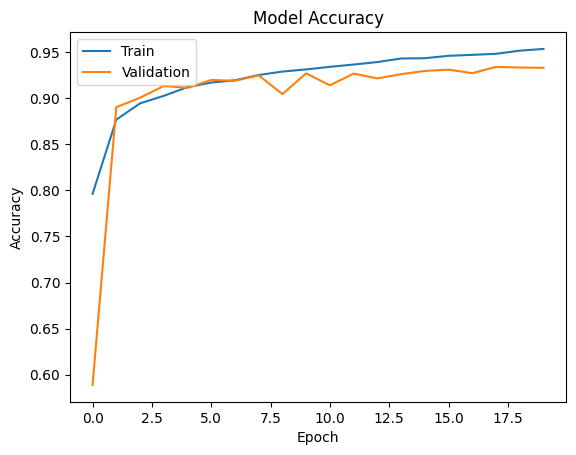

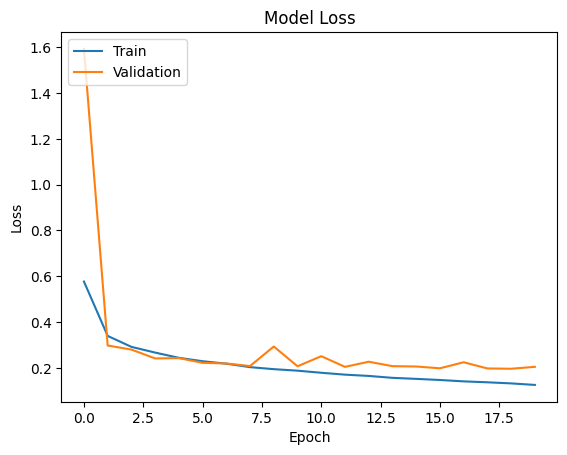

313/313 [==============================] - 1s 3ms/step


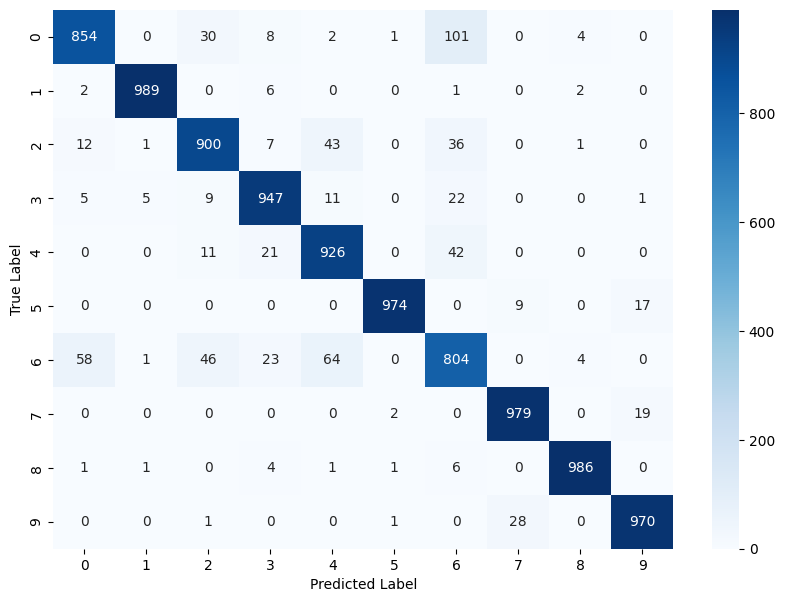

313/313 [==============================] - 1s 3ms/step


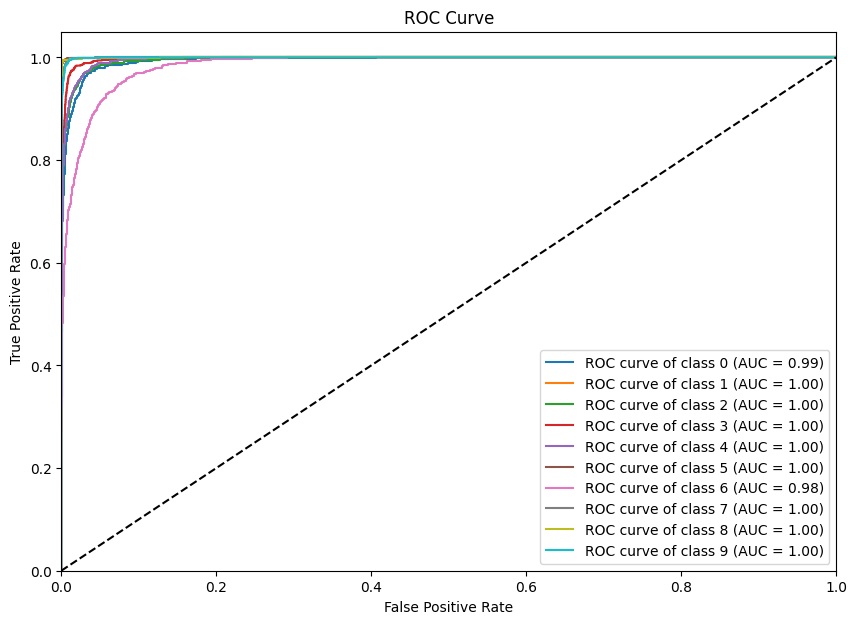

313/313 [==============================] - 1s 2ms/step


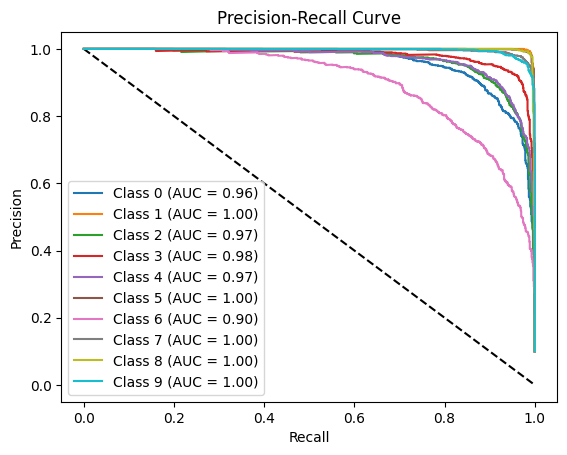

In [38]:
plot_accuracy(history6)
plot_loss(history6)
plot_confusion_matrix(model6, X_test, y_test)
plot_roc_curve(model6, X_test, y_test)
plot_precision_recall_curve(model6, X_test, y_test)